In [11]:
import matplotlib.pyplot as plt
import json
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE

def tsne(df, n_dim=2, n_iter=1000):
    emb_list = []
    for _ in df["emb"]:
        emb_list.append(_)
    df_ = pd.DataFrame(emb_list)
    tsne = TSNE(n_components=n_dim, verbose=0, perplexity=40, n_iter=n_iter)
    tsne_results = tsne.fit_transform(df_)
    tsne_results = pd.DataFrame(tsne_results)
    df = pd.concat([df['y'], tsne_results], axis=1)
    df.columns = ["y", "x1", "x2"]
    return df

def plot_tsne_df(name, df, show=True):
    color_dict = {0: "red", 1: "blue", 2: "green", 3: "orange",
                  4: "violet", 5: "olive", 6: "teal", 7: "gold"}

    df = tsne(df)
    print("origin_lengh ",len(df))
    if "pubmed" in name.lower():
        df = df.sample(n=3000)
        df.index = list(range(len(df)))
    print("df.sampleed ",len(df))
    if df.shape[1]-1 == 2:
        plt.figure(figsize=(10, 10))
        for y in df["y"].unique():
            plt.scatter(df.loc[df["y"]==y, "x1"], 
                        df.loc[df["y"]==y, "x2"], 
                        color = color_dict[y], 
                        label='class_{}'.format(y))
        png_name = "{} embeddings with {}".format(name.split("_")[0], name.split("_")[1])
        plt.xlabel(png_name)
        if show:
            plt.show()
        plt.savefig("./tsne_fig/"+ png_name + ".png")
        print(png_name + " is saved!")
    elif df.shape[1]-1 == 3:
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        for y in df["y"].unique():       
            ax.plot(df.iloc[df["y"]==y, 1], 
                    df.iloc[df["y"]==y, 2], 
                    df.iloc[df["y"]==y, 3], 
                    label='class_{}'.format(y), 
                    color=color_dict[y], alpha=0.3, marker="o")
        plt.show()

/Users/yinghaosong/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yinghaosong/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


origin_lengh  19717
df.sampleed  3000
Pubmed embeddings with ARGE is saved!


/Users/yinghaosong/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yinghaosong/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


origin_lengh  19717
df.sampleed  3000
Pubmed embeddings with PARGE is saved!


/Users/yinghaosong/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yinghaosong/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


origin_lengh  19717
df.sampleed  3000
Pubmed embeddings with ARVGE is saved!


/Users/yinghaosong/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/yinghaosong/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


origin_lengh  19717
df.sampleed  3000
Pubmed embeddings with PARVGE is saved!


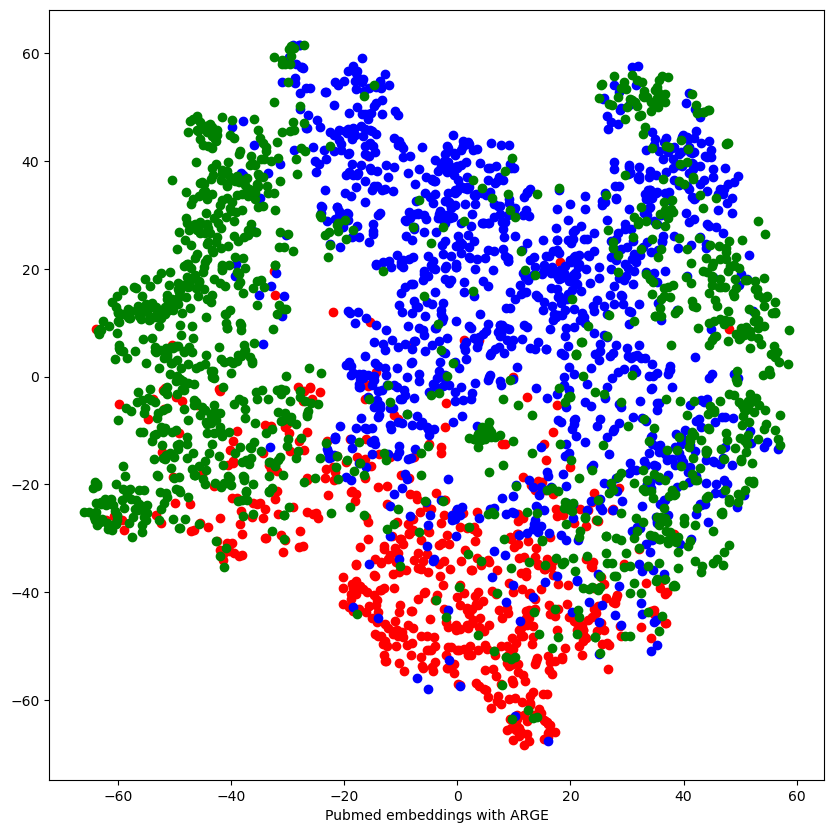

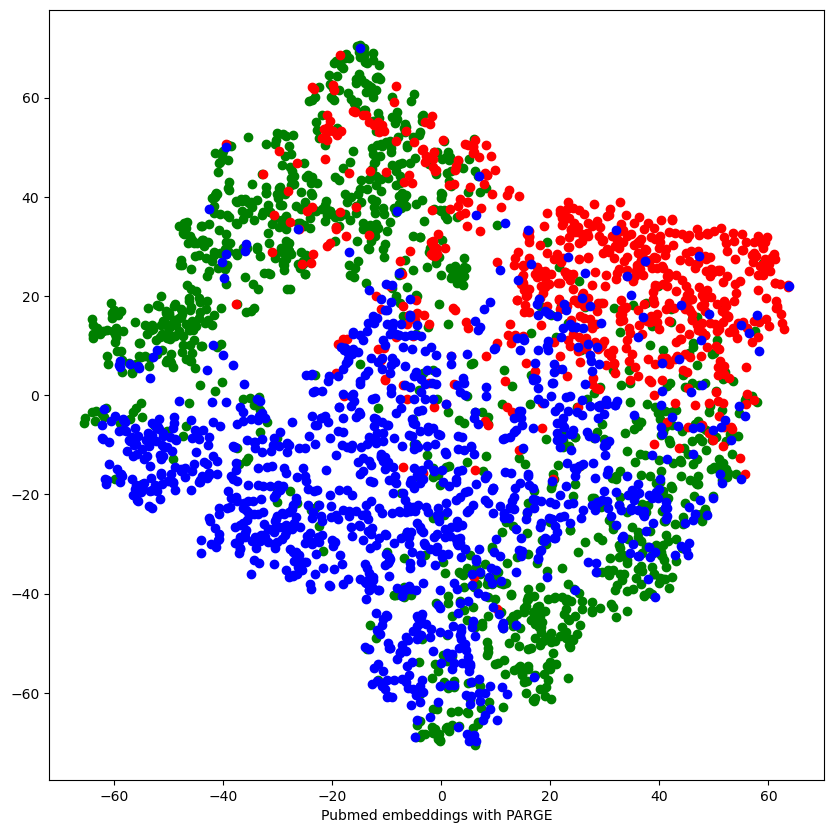

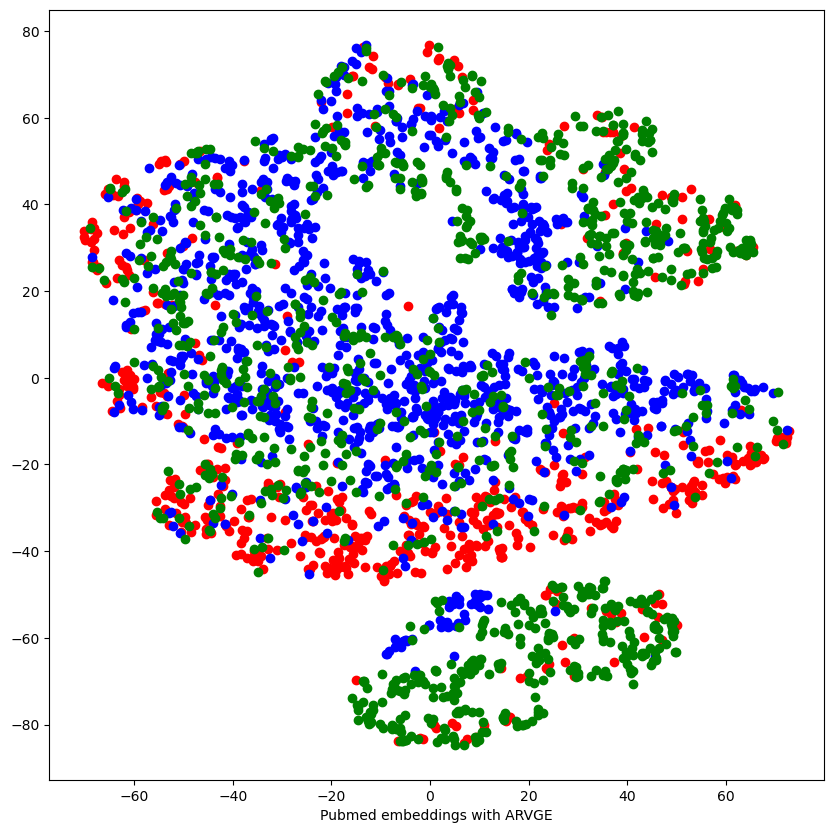

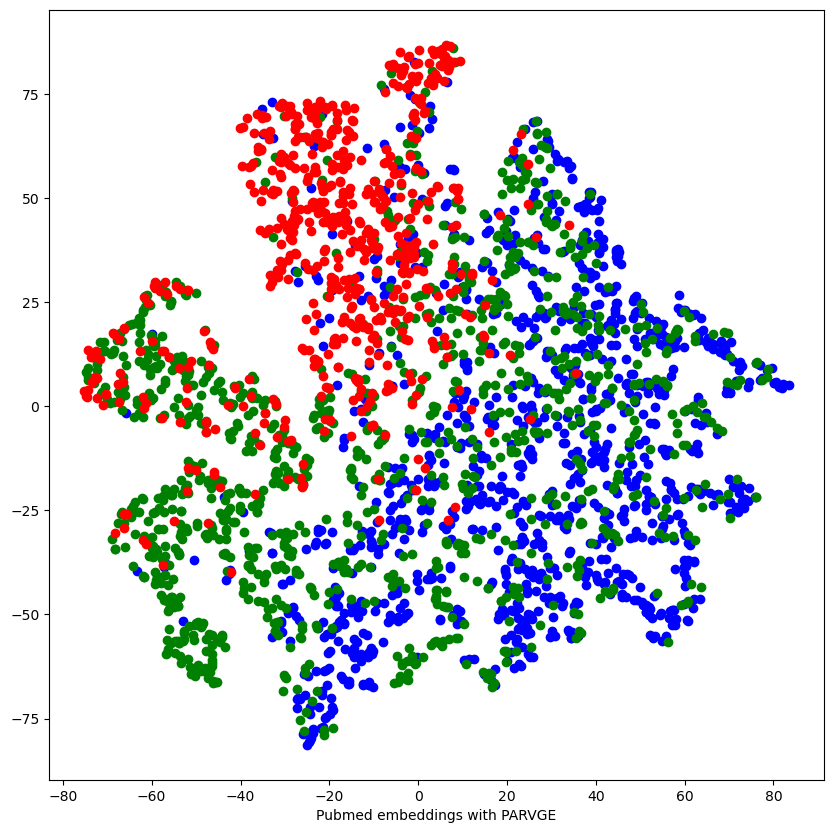

In [12]:
all_df = {}
##
csv_path = "../best_emb/"
# df_arge_cora = pd.read_csv(csv_path + "ae_cora_alpha0.0_epoch70.csv")
# all_df["Cora_ARGE"] = df_arge_cora
# df_parge_cora = pd.read_csv(csv_path + "ae_cora_alpha1.0_epoch_83_best.csv")
# all_df["Cora_PARGE"] = df_parge_cora
# df_arvge_cora = pd.read_csv(csv_path + "vae_cora_alpha0.0_epoch70.csv")
# all_df["Cora_ARVGE"] = df_arvge_cora
# df_parvge_cora = pd.read_csv(csv_path + "vae_cora_alpha0.01_epoch_81_best.csv")
# all_df["Cora_PARVGE"] = df_parvge_cora
# #
# df_arge_citeseer = pd.read_csv(csv_path + "ae_citeseer_alpha0.0_epoch70.csv")
# all_df["Citeseer_ARGE"] = df_arge_citeseer
# df_parge_citeseer = pd.read_csv(csv_path + "ae_citeseer_alpha3.0_epoch_22_best.csv")
# all_df["Citeseer_PARGE"] = df_parge_citeseer
# df_arvge_citeseer = pd.read_csv(csv_path + "vae_citeseer_alpha0.0_epoch70.csv")
# all_df["Citeseer_ARVGE"] = df_arvge_citeseer
# df_parvge_citeseer = pd.read_csv(csv_path + "vae_citeseer_alpha5.0_epoch_55_best.csv")
# all_df["Citeseer_PARVGE"] = df_parvge_citeseer
#
df_arge_citeseer = pd.read_csv(csv_path + "ae_pubmed_alpha0.0_epoch170.csv")
all_df["Pubmed_ARGE"] = df_arge_citeseer
df_parge_citeseer = pd.read_csv(csv_path + "ae_pubmed_alpha5.0_epoch_163_best.csv")
all_df["Pubmed_PARGE"] = df_parge_citeseer
df_arvge_citeseer = pd.read_csv(csv_path + "vae_pubmed_alpha0.0_epoch170.csv")
all_df["Pubmed_ARVGE"] = df_arvge_citeseer
df_parvge_citeseer = pd.read_csv(csv_path + "vae_pubmed_alpha0.07_epoch_200_best.csv")
all_df["Pubmed_PARVGE"] = df_parvge_citeseer

for name, df_ in all_df.items():
    if "Pubmed" in name:
        df_["emb"] = df_["emb"].map(lambda x: eval(x))
        plot_tsne_df(name, df_, show=False)

In [ ]:
color_dict = {0: "red", 1: "blue", 2: "green", 3: "orange",
                  4: "violet", 5: "olive", 6: "teal", 7: "gold"}